In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Data Preprocessing

For K-means clustering, we'll need numeric data. Since 'Gender' is a categorical variable, we need to encode it.

In [9]:
# Convert categorical data to numerical data
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# Feature Selection

In [12]:
# Selecting features for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Choosing the Number of Clusters

The Elbow method can be used to determine the optimal number of clusters.

C:\Users\krrah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\krrah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\krrah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\krrah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

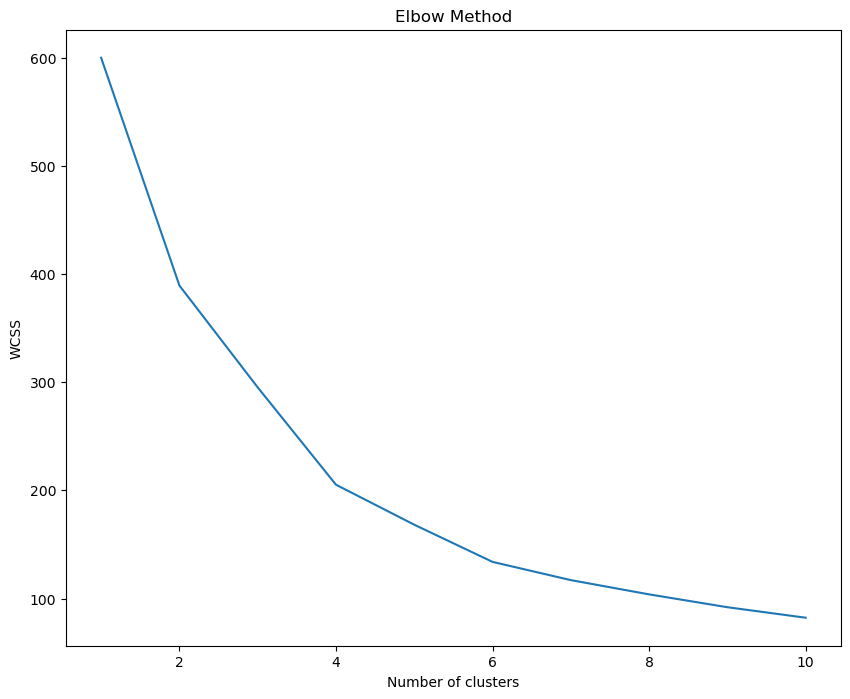

In [14]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Applying K-means Clustering

In [22]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(features_scaled)

# Adding clustering labels to the dataset
df['Cluster'] = cluster_labels

C:\Users\krrah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


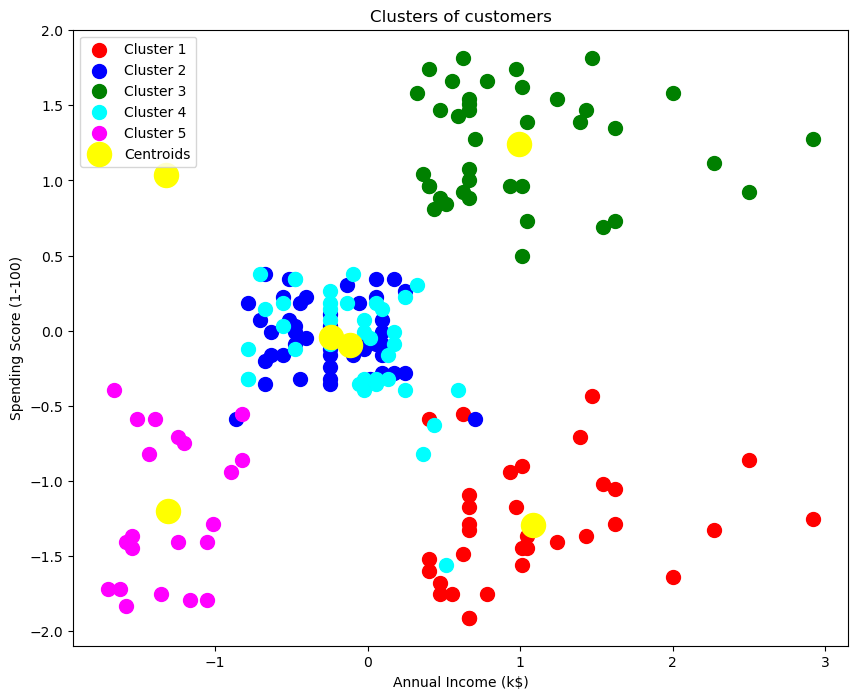

In [23]:
plt.figure(figsize=(10, 8))
plt.scatter(features_scaled[cluster_labels == 0, 1], features_scaled[cluster_labels == 0, 2], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(features_scaled[cluster_labels == 1, 1], features_scaled[cluster_labels == 1, 2], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(features_scaled[cluster_labels == 2, 1], features_scaled[cluster_labels == 2, 2], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(features_scaled[cluster_labels == 3, 1], features_scaled[cluster_labels == 3, 2], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(features_scaled[cluster_labels == 4, 1], features_scaled[cluster_labels == 4, 2], s = 100, c = 'magenta', label = 'Cluster 5')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()